In [71]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

In [72]:
df = pd.read_csv('data/income2.csv')

In [73]:
df.head()

,Index,Education,Seniority,Income
0,1,21.586207,113.103448,99.917173
1,2,18.275862,119.310345,92.579135
2,3,12.068966,100.689655,34.678727
3,4,17.034483,187.586207,78.702806
4,5,19.931034,20.000000,68.009922


In [74]:
df.describe()

,Index,Education,Seniority,Income
count,30.000000,30.000000,30.000000,30.000000
mean,15.500000,16.386207,93.862069,62.744733
std,8.803408,3.810622,55.715623,27.013285
min,1.000000,10.000000,20.000000,17.613593
25%,8.250000,12.482759,44.827586,36.392043
50%,15.500000,17.034483,94.482759,70.804791
75%,22.750000,19.931034,133.275862,85.930608
max,30.000000,21.586207,187.586207,99.917173


In [75]:
# all values are numbers
print(df.applymap(np.isreal).sum())
print(df.applymap(np.isnan).sum())

Index        30
Education    30
Seniority    30
Income       30
dtype: int64
Index        0
Education    0
Seniority    0
Income       0
dtype: int64


In [81]:
df.drop("Index", axis = 1, inplace = True)

In [84]:
# No outliers

from pandas.api.types import is_numeric_dtype

column_is_numeric = [is_numeric_dtype(df[i])  for i in df.columns]
IQR = np.array((df.iloc[:,column_is_numeric].quantile(0.75) - df.iloc[:,column_is_numeric].quantile(0.25)) * 1.5)
IQR_range = pd.DataFrame()
IQR_range['low'] = df.iloc[:,column_is_numeric].quantile(0.25) - IQR
IQR_range['high'] = df.iloc[:,column_is_numeric].quantile(0.75)+ IQR

preserved_rows = np.ones(df.shape[0],dtype = bool)
for i in IQR_range.index:
    print(i)
    preserved_rows = ((df[i]<=IQR_range.loc[i, 'high']) & preserved_rows)
    preserved_rows = ((df[i]>=IQR_range.loc[i, 'low']) & preserved_rows)
    
df_no_outlier = df[preserved_rows]
df_no_outlier.describe()     
df[preserved_rows == False].head()



Education
Seniority
Income


,Education,Seniority,Income
0,21.586207,113.103448,99.917173
1,18.275862,119.310345,92.579135
2,12.068966,100.689655,34.678727
3,17.034483,187.586207,78.702806
4,19.931034,20.000000,68.009922
5,18.275862,26.206897,71.504485
6,19.931034,150.344828,87.970467
7,21.172414,82.068966,79.811030
8,20.344828,88.275862,90.006327
9,10.000000,113.103448,45.655530


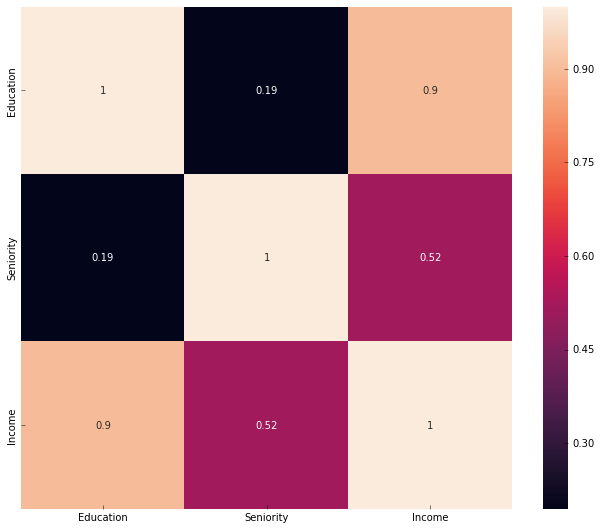

In [93]:
corr = df.corr()
plt.subplots(figsize=(11, 9))
sns.heatmap(corr, annot=True)

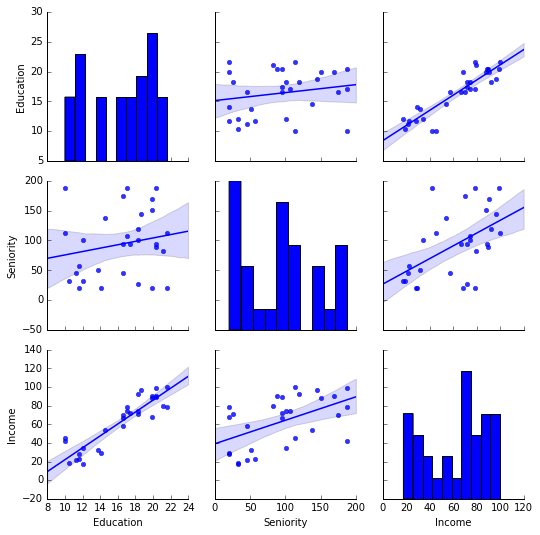

In [94]:
sns.pairplot(df, kind='reg')

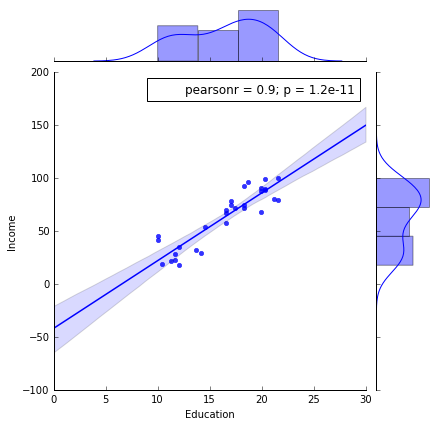

In [89]:
sns.jointplot(x='Education', y='Income', kind='reg', data=df)

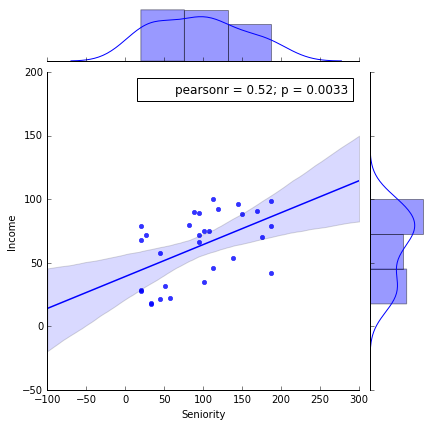

In [90]:
sns.jointplot(x='Seniority', y='Income', kind='reg', data=df)